In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
customers = pd.read_csv('Ecommerce Customers')

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


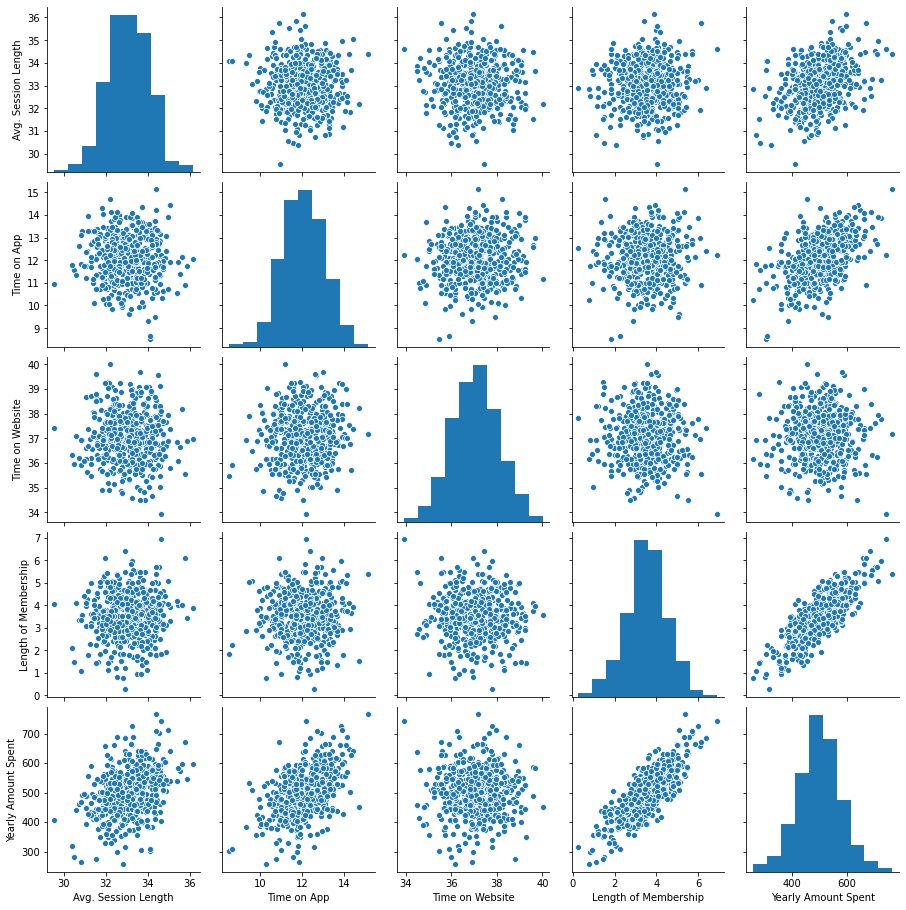

In [10]:
sns.pairplot(customers)

In [13]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
print(customers.columns)

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


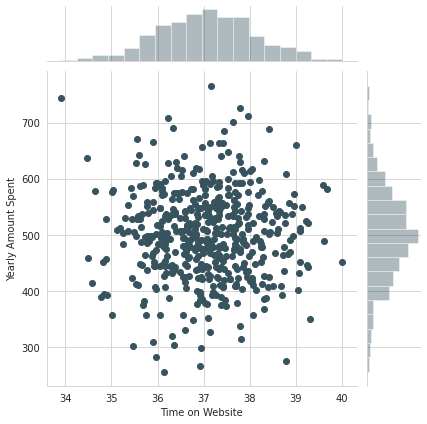

In [14]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

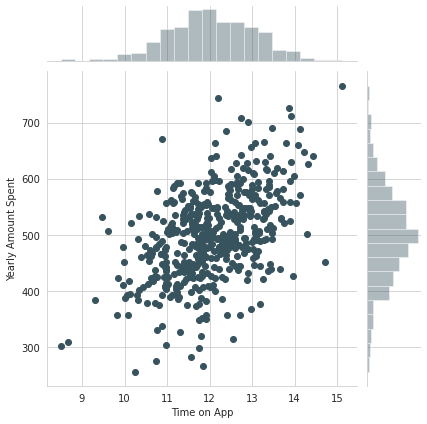

In [15]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

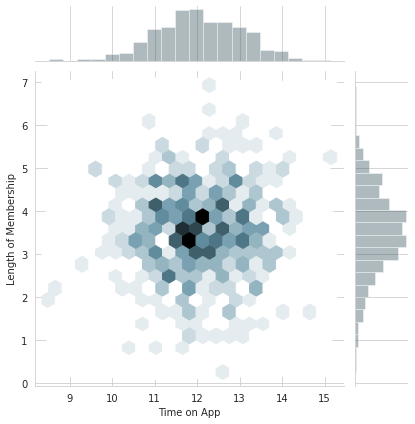

In [19]:
sns.jointplot(x='Time on App', y='Length of Membership',kind='hex', data=customers)

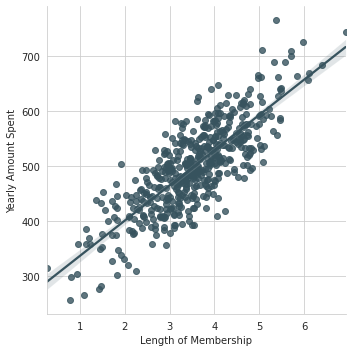

In [20]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=customers)

In [21]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


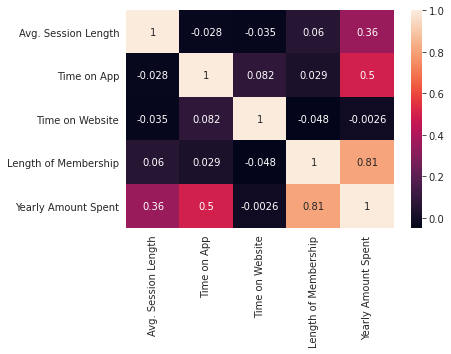

In [22]:
sns.heatmap(customers.corr(), annot=True)

In [23]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [26]:
# a predição será os dados de x e o resultado o preço
#definindo o X ( FEATURES)
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers[['Yearly Amount Spent']]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# test size é a % do seu data que você quer alocar ao teste, random_state é a qtt de divisões entre o train e teste, se repetir sempre o mesmo numero os resultados serão o mesmo, se deixar no random cada vez um resultado é encontrado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)  # o erro pode varias dependendo do eandom_state, o ideal é rodar o erro com diversos randon_state ate achar o mdelo com menos erro

In [33]:
# mdoel training and building
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [34]:
#fit model or training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# model evaluation
# print intercepts
print(lm.intercept_)

[-1047.93278225]


In [36]:
# prints coeficinetes de cada uma das colunas X_train
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

In [37]:
X_train.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [47]:
# predictions off test set
predictions = lm.predict(X_test)
predictions

array([[456.44186104],
       [402.72005312],
       [409.2531539 ],
       [591.4310343 ],
       [590.01437275],
       [548.82396607],
       [577.59737969],
       [715.44428115],
       [473.7893446 ],
       [545.9211364 ],
       [337.8580314 ],
       [500.38506697],
       [552.93478041],
       [409.6038964 ],
       [765.52590754],
       [545.83973731],
       [693.25969124],
       [507.32416226],
       [573.10533175],
       [573.2076631 ],
       [397.44989709],
       [555.0985107 ],
       [458.19868141],
       [482.66899911],
       [559.2655959 ],
       [413.00946082],
       [532.25727408],
       [377.65464817],
       [535.0209653 ],
       [447.80070905],
       [595.54339577],
       [667.14347072],
       [511.96042791],
       [573.30433971],
       [505.02260887],
       [565.30254655],
       [460.38785393],
       [449.74727868],
       [422.87193429],
       [456.55615271],
       [598.10493696],
       [449.64517443],
       [615.34948995],
       [511

In [48]:
# valores reais das casas, X_test e y_test sao os valores verdadeiros, y_train ṕe a predição
y_test

,Yearly Amount Spent
18,452.315675
361,401.033135
104,410.069611
4,599.406092
156,586.155870
...,...
147,479.731938
346,488.387526
423,461.112248
17,407.704548


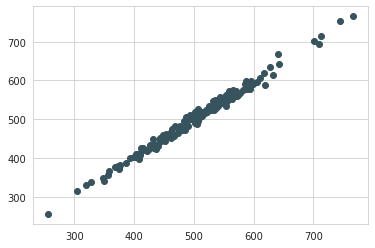

In [49]:
plt.scatter(y_test, predictions)

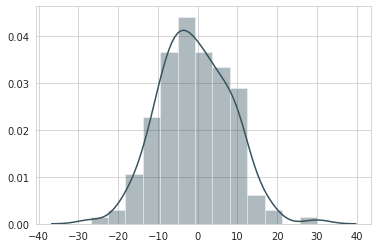

In [50]:
sns.distplot((y_test - predictions))

In [52]:
from sklearn import metrics

MAE: 7.22814865343086
MSE: 79.81305165097483
RMSE: 8.933815066978655


In [79]:
coeffecients = pd.DataFrame(lm.coef_.T,X.columns.T)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [ ]:
#     Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
#     Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
#     Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
#     Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

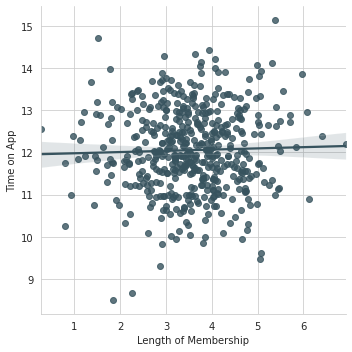

In [80]:
sns.lmplot(x='Length of Membership', y='Time on App',data=customers)

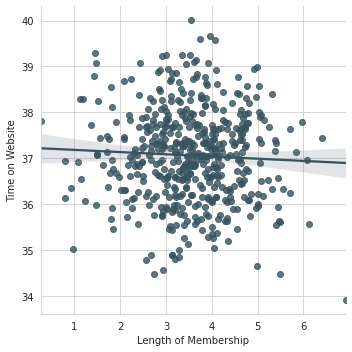

In [81]:
sns.lmplot(x='Length of Membership', y='Time on Website',data=customers)

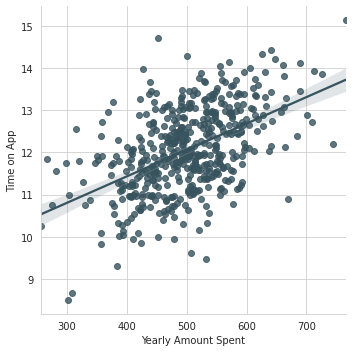

In [82]:
sns.lmplot(x='Yearly Amount Spent', y='Time on App',data=customers)

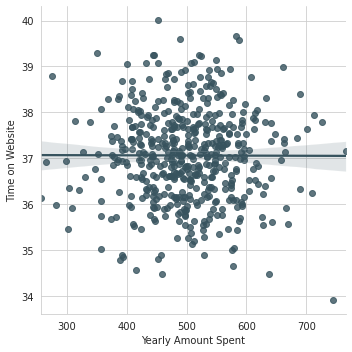

In [83]:
sns.lmplot(x='Yearly Amount Spent', y='Time on Website',data=customers)